In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import re

In [99]:
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '../Scripts'))
sys.path.append(scripts_path)

In [100]:
from path import PATH_AUTO_CSV, PATH_AUTO_XLSX

## 1 - Import Data

In [101]:
data = pd.read_csv(PATH_AUTO_CSV)

In [102]:
data2 = data.copy()

In [103]:
data2.head()

,CarName,carModele,CarPrice,Etat,Milieage,Transmission,Annee,Carburant,CarPuissance,CarVendeur,technical_details,seats,Options,ConsommationEnergétique,CouleurGarnissageIntérieur,link
0,Ford,Focus,"€ 4 990,-5",Bon prix,188 790 km,Boîte manuelle,08/2015,Diesel,85 kW (116 CH),Professionnel,5,5,85 kW (116 CH) Boîte manuelle 1 560 cm³ 6 4 1 ...,"Euro 6b Diesel 3,8 l/100 km (mixte) 109 g/km (...",Gris Noir Tissu,https://www.autoscout24.be/fr/offres/ford-focu...
1,Audi,e-tron GT,"€ 59 950,-1, 5",Bon prix,27 500 km,501 km,09/2021,Electrique,350 kW (476 CH),Professionnel,5,4,350 kW (476 CH) Boîte automatique 1 2 254 kg,Électrique 501 km Incluse 0 g/km (comb.),Gris Kemora Grey Pearl Effect Métallisé Gris C...,https://www.autoscout24.be/fr/offres/audi-e-tr...
2,MINI,Cooper Countryman,"€ 10 950,-5",Pas d'information,28 900 km,Boîte automatique,11/2015,Essence,90 kW (122 CH),Professionnel,5,5,90 kW (122 CH) Boîte automatique 1 598 cm³ 6 4...,"Euro 6b Essence 5,9 l/100 km (mixte) 159 g/km ...",Bleu Métallisé Noir Cuir,https://www.autoscout24.be/fr/offres/mini-coop...
3,Volkswagen,Golf,"€ 4 000,-5",Très bon prix,73 409 km,Boîte manuelle,02/2006,Essence,55 kW (75 CH),Professionnel,5,3,55 kW (75 CH) Boîte manuelle 1 390 cm³ 5 4 1 1...,"Euro 4 Essence 6,8 l/100 km (mixte) 166 g/km (...",Gris Métallisé Noir Tissu,https://www.autoscout24.be/fr/offres/volkswage...
4,Audi,A4,"€ 5 900,-5",Pas d'information,279 000 km,Boîte manuelle,01/2009,Diesel,100 kW (136 CH),Professionnel,5,5,100 kW (136 CH) Boîte manuelle 1 968 cm³ 6 4 1...,"Euro 4 Diesel 5,4 l/100 km (mixte) 143 g/km (m...",Gris Métallisé Noir Cuir partiel,https://www.autoscout24.be/fr/offres/audi-a4-2...


## 2 - EDA

#### 2 - 1 Nan Values

In [104]:
data2.isna().sum()

CarName                       0
carModele                     0
CarPrice                      0
Etat                          0
Milieage                      0
Transmission                  0
Annee                         0
Carburant                     0
CarPuissance                  0
CarVendeur                    0
technical_details             0
seats                         0
Options                       0
ConsommationEnergétique       0
CouleurGarnissageIntérieur    0
link                          0
dtype: int64

<Axes: >

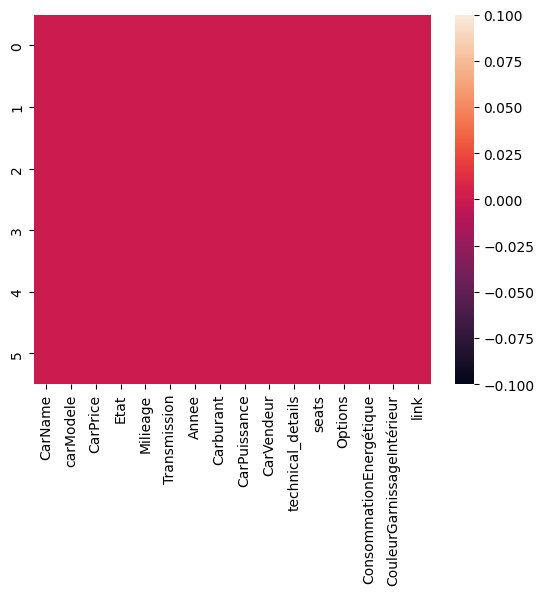

In [105]:
sns.heatmap(data2.isna())

#### 2 - 2 data-info

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CarName                     6 non-null      object
 1   carModele                   6 non-null      object
 2   CarPrice                    6 non-null      object
 3   Etat                        6 non-null      object
 4   Milieage                    6 non-null      object
 5   Transmission                6 non-null      object
 6   Annee                       6 non-null      object
 7   Carburant                   6 non-null      object
 8   CarPuissance                6 non-null      object
 9   CarVendeur                  6 non-null      object
 10  technical_details           6 non-null      int64 
 11  seats                       6 non-null      int64 
 12  Options                     6 non-null      object
 13  ConsommationEnergétique     6 non-null      object
 14

#### 2 - 3 Data Cleaning

##### 2 - 3.1 FullCareName

In [107]:
def fillcareName(x,y) :
    return x.upper() + '-' + y.upper()

In [108]:
data2['fillcareName'] = data2.apply(lambda row : fillcareName(row['CarName'], row['carModele']), axis = 1)

##### 2 - 3.2 CarPrice

In [109]:
def extractPrice(text):
    cleaned_text = re.sub(r'[^\d]', '', text)  
    return int(cleaned_text[:-1]) 

In [110]:
data2['Price'] = data2['CarPrice'].apply(extractPrice)

##### 2 - 3.3 CarPrice

In [111]:
data2['Price'] = data2['CarPrice'].apply(extractPrice)

In [112]:
price_mapping = {
    "Très bon prix": 3,
    "Bon prix": 2,
    "Prix correct": 1,
    "Pas d'information": 0
}

In [113]:
data2['etatCategory'] = data2['Etat'].map(price_mapping)

##### 2 - 3.4 Milieage

In [114]:
def extract_kilometrage(text):
    return int(re.sub(r'[^\d]', '', text))

In [115]:
data2['Milieage'] = data2['Milieage'].apply(extract_kilometrage) 

##### 2 - 3.5 Annee

In [116]:
data2['Annee'].unique()

array(['08/2015', '09/2021', '11/2015', '02/2006', '01/2009'],
      dtype=object)

In [117]:
def extract_month(dates):
    dates_series = pd.Series(dates)
    dates_series = pd.to_datetime(dates_series, errors='coerce')
    months = dates_series.dt.month
    return months

In [118]:
def extract_year(dates):
    dates_series = pd.Series(dates)
    dates_series = pd.to_datetime(dates_series, errors='coerce')
    year = dates_series.dt.year
    return year

In [119]:
data2['Month'] = extract_month(data2['Annee'])

C:\Users\abdel\AppData\Local\Temp\ipykernel_3564\3126567526.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_series = pd.to_datetime(dates_series, errors='coerce')


In [120]:
data2['Year'] = extract_year(data2['Annee'])

C:\Users\abdel\AppData\Local\Temp\ipykernel_3564\39930126.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates_series = pd.to_datetime(dates_series, errors='coerce')


###### 2 - 3.6 Options

In [121]:
for i in range(4) :
    print(data2['Options'][i])

85 kW (116 CH) Boîte manuelle 1 560 cm³ 6 4 1 368 kg 
350 kW (476 CH) Boîte automatique 1 2 254 kg 
90 kW (122 CH) Boîte automatique 1 598 cm³ 6 4 1 340 kg 
55 kW (75 CH) Boîte manuelle 1 390 cm³ 5 4 1 154 kg 


In [122]:
def extract_puissance(text):
    match = re.search(r'(\d{2,3})\s?kW', text)
    if match:
        return int(match.group(1))  # Convert to int
    return None

# Function to extract Transmission type (manual or automatic)
def extract_transmission(text):
    match = re.search(r'(Boîte .+?)\s(\d)', text)
    if match:
        return match.group(1)  # Return as string
    return None

def extract_cylindree(detail):
    # Extract the cubic centimeters value and remove any spaces or special characters
    match = re.search(r'(\d{1,3}(?:[ ,]\d{3})*)\s*cm³', detail)
    if match:
        # Convert to integer and remove any spaces within the number
        return int(match.group(1).replace(' ', '').replace(',', ''))
    return None

# Function to extract Vitesses (Number of gears)
def extract_vitesses(text):
    match = re.search(r'(\d)\s?(\d)', text)
    if match:
        return int(match.group(1))  # Convert to int
    return None

# Function to extract Cylindres (Number of cylinders)
def extract_weight(text):
    match = re.search(r'(\d+\s?\d+)\s?kg', text)
    if match:
        return int(match.group(1).replace('\u202f', '').replace(' ', ''))  # Remove special spaces and return as int
    return None

In [123]:
data2['Puissance'] = data2['Options'].apply(extract_puissance)
data2['TransmissionV2'] = data2['Options'].apply(extract_transmission)
data2['Cylindrée'] = data2['Options'].apply(extract_cylindree)
data2['Vitesses'] = data2['Options'].apply(extract_vitesses)
data2['Cylindres'] = data2['Options'].apply(extract_weight)

###### 2 - 3.7 HorsePower

In [124]:
def extract_number_ch(text):
    match = re.search(r'\((\d+)\s*CH\)', text) 
    if match:
        return int(match.group(1))  
    return None

In [125]:
data2['HorsePower'] = data2['CarPuissance'].apply(extract_number_ch)

In [126]:
pd.set_option('display.max_columns', None)

In [127]:
data2['link'][0]

'https://www.autoscout24.be/fr/offres/ford-focus-1-5-tdci-pdc-startstop-cc-navi-top-diesel-gris-f53bd131-a96c-4128-9a3e-9b0856fbb4fa'

In [128]:
data2

,CarName,carModele,CarPrice,Etat,Milieage,Transmission,Annee,Carburant,CarPuissance,CarVendeur,technical_details,seats,Options,ConsommationEnergétique,CouleurGarnissageIntérieur,link,fillcareName,Price,etatCategory,Month,Year,Puissance,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower
0,Ford,Focus,"€ 4 990,-5",Bon prix,188790,Boîte manuelle,08/2015,Diesel,85 kW (116 CH),Professionnel,5,5,85 kW (116 CH) Boîte manuelle 1 560 cm³ 6 4 1 ...,"Euro 6b Diesel 3,8 l/100 km (mixte) 109 g/km (...",Gris Noir Tissu,https://www.autoscout24.be/fr/offres/ford-focu...,FORD-FOCUS,4990,2,8,2015,85,Boîte manuelle,1560.0,8,1368,116
1,Audi,e-tron GT,"€ 59 950,-1, 5",Bon prix,27500,501 km,09/2021,Electrique,350 kW (476 CH),Professionnel,5,4,350 kW (476 CH) Boîte automatique 1 2 254 kg,Électrique 501 km Incluse 0 g/km (comb.),Gris Kemora Grey Pearl Effect Métallisé Gris C...,https://www.autoscout24.be/fr/offres/audi-e-tr...,AUDI-E-TRON GT,599501,2,9,2021,350,Boîte automatique,NaN,3,2254,476
2,MINI,Cooper Countryman,"€ 10 950,-5",Pas d'information,28900,Boîte automatique,11/2015,Essence,90 kW (122 CH),Professionnel,5,5,90 kW (122 CH) Boîte automatique 1 598 cm³ 6 4...,"Euro 6b Essence 5,9 l/100 km (mixte) 159 g/km ...",Bleu Métallisé Noir Cuir,https://www.autoscout24.be/fr/offres/mini-coop...,MINI-COOPER COUNTRYMAN,10950,0,11,2015,90,Boîte automatique,1598.0,9,1340,122
3,Volkswagen,Golf,"€ 4 000,-5",Très bon prix,73409,Boîte manuelle,02/2006,Essence,55 kW (75 CH),Professionnel,5,3,55 kW (75 CH) Boîte manuelle 1 390 cm³ 5 4 1 1...,"Euro 4 Essence 6,8 l/100 km (mixte) 166 g/km (...",Gris Métallisé Noir Tissu,https://www.autoscout24.be/fr/offres/volkswage...,VOLKSWAGEN-GOLF,4000,3,2,2006,55,Boîte manuelle,1390.0,5,1154,75
4,Audi,A4,"€ 5 900,-5",Pas d'information,279000,Boîte manuelle,01/2009,Diesel,100 kW (136 CH),Professionnel,5,5,100 kW (136 CH) Boîte manuelle 1 968 cm³ 6 4 1...,"Euro 4 Diesel 5,4 l/100 km (mixte) 143 g/km (m...",Gris Métallisé Noir Cuir partiel,https://www.autoscout24.be/fr/offres/audi-a4-2...,AUDI-A4,5900,0,1,2009,100,Boîte manuelle,1968.0,1,1520,136
5,Skoda,Rapid/Spaceback,"€ 7 450,-5",Bon prix,100063,Boîte manuelle,08/2015,Diesel,77 kW (105 CH),Professionnel,5,5,77 kW (105 CH) Boîte manuelle 1 598 cm³ 5 4 1 ...,"Euro 5 Diesel 4,4 l/100 km (mixte) 114 g/km (m...",Noir Métallisé Beige Tissu,https://www.autoscout24.be/fr/offres/skoda-rap...,SKODA-RAPID/SPACEBACK,7450,2,8,2015,77,Boîte manuelle,1598.0,7,1265,105


In [129]:
data2

,CarName,carModele,CarPrice,Etat,Milieage,Transmission,Annee,Carburant,CarPuissance,CarVendeur,technical_details,seats,Options,ConsommationEnergétique,CouleurGarnissageIntérieur,link,fillcareName,Price,etatCategory,Month,Year,Puissance,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower
0,Ford,Focus,"€ 4 990,-5",Bon prix,188790,Boîte manuelle,08/2015,Diesel,85 kW (116 CH),Professionnel,5,5,85 kW (116 CH) Boîte manuelle 1 560 cm³ 6 4 1 ...,"Euro 6b Diesel 3,8 l/100 km (mixte) 109 g/km (...",Gris Noir Tissu,https://www.autoscout24.be/fr/offres/ford-focu...,FORD-FOCUS,4990,2,8,2015,85,Boîte manuelle,1560.0,8,1368,116
1,Audi,e-tron GT,"€ 59 950,-1, 5",Bon prix,27500,501 km,09/2021,Electrique,350 kW (476 CH),Professionnel,5,4,350 kW (476 CH) Boîte automatique 1 2 254 kg,Électrique 501 km Incluse 0 g/km (comb.),Gris Kemora Grey Pearl Effect Métallisé Gris C...,https://www.autoscout24.be/fr/offres/audi-e-tr...,AUDI-E-TRON GT,599501,2,9,2021,350,Boîte automatique,NaN,3,2254,476
2,MINI,Cooper Countryman,"€ 10 950,-5",Pas d'information,28900,Boîte automatique,11/2015,Essence,90 kW (122 CH),Professionnel,5,5,90 kW (122 CH) Boîte automatique 1 598 cm³ 6 4...,"Euro 6b Essence 5,9 l/100 km (mixte) 159 g/km ...",Bleu Métallisé Noir Cuir,https://www.autoscout24.be/fr/offres/mini-coop...,MINI-COOPER COUNTRYMAN,10950,0,11,2015,90,Boîte automatique,1598.0,9,1340,122
3,Volkswagen,Golf,"€ 4 000,-5",Très bon prix,73409,Boîte manuelle,02/2006,Essence,55 kW (75 CH),Professionnel,5,3,55 kW (75 CH) Boîte manuelle 1 390 cm³ 5 4 1 1...,"Euro 4 Essence 6,8 l/100 km (mixte) 166 g/km (...",Gris Métallisé Noir Tissu,https://www.autoscout24.be/fr/offres/volkswage...,VOLKSWAGEN-GOLF,4000,3,2,2006,55,Boîte manuelle,1390.0,5,1154,75
4,Audi,A4,"€ 5 900,-5",Pas d'information,279000,Boîte manuelle,01/2009,Diesel,100 kW (136 CH),Professionnel,5,5,100 kW (136 CH) Boîte manuelle 1 968 cm³ 6 4 1...,"Euro 4 Diesel 5,4 l/100 km (mixte) 143 g/km (m...",Gris Métallisé Noir Cuir partiel,https://www.autoscout24.be/fr/offres/audi-a4-2...,AUDI-A4,5900,0,1,2009,100,Boîte manuelle,1968.0,1,1520,136
5,Skoda,Rapid/Spaceback,"€ 7 450,-5",Bon prix,100063,Boîte manuelle,08/2015,Diesel,77 kW (105 CH),Professionnel,5,5,77 kW (105 CH) Boîte manuelle 1 598 cm³ 5 4 1 ...,"Euro 5 Diesel 4,4 l/100 km (mixte) 114 g/km (m...",Noir Métallisé Beige Tissu,https://www.autoscout24.be/fr/offres/skoda-rap...,SKODA-RAPID/SPACEBACK,7450,2,8,2015,77,Boîte manuelle,1598.0,7,1265,105


In [130]:
def extract_emission_class(text):
    match = re.search(r'(Euro \d+[a-z]*)', text)
    return match.group(1) if match else None

def extract_fuel_type(text):
    match = re.search(r'(Diesel|Essence|Électrique)', text, re.IGNORECASE)
    return match.group(1) if match else None

def extract_fuel_consumption(text):
    match = re.search(r'(\d+,?\d*) l/100 km', text)
    return match.group(1).replace(',', '.') if match else None

def extract_co2_emissions(text):
    match = re.search(r'(\d+) g/km', text)
    return int(match.group(1)) if match else None

In [131]:
data2["ClasseEmission"] = data2['ConsommationEnergétique'].apply(extract_emission_class)
data2["Typedecarburant"] = data2['ConsommationEnergétique'].apply(extract_fuel_type)
data2["Consommationdecarburant"] = data2['ConsommationEnergétique'].apply(extract_fuel_consumption)
data2["ÉmissionsdeCO2"] = data2['ConsommationEnergétique'].apply(extract_co2_emissions)

In [132]:
data2

,CarName,carModele,CarPrice,Etat,Milieage,Transmission,Annee,Carburant,CarPuissance,CarVendeur,technical_details,seats,Options,ConsommationEnergétique,CouleurGarnissageIntérieur,link,fillcareName,Price,etatCategory,Month,Year,Puissance,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower,ClasseEmission,Typedecarburant,Consommationdecarburant,ÉmissionsdeCO2
0,Ford,Focus,"€ 4 990,-5",Bon prix,188790,Boîte manuelle,08/2015,Diesel,85 kW (116 CH),Professionnel,5,5,85 kW (116 CH) Boîte manuelle 1 560 cm³ 6 4 1 ...,"Euro 6b Diesel 3,8 l/100 km (mixte) 109 g/km (...",Gris Noir Tissu,https://www.autoscout24.be/fr/offres/ford-focu...,FORD-FOCUS,4990,2,8,2015,85,Boîte manuelle,1560.0,8,1368,116,Euro 6b,Diesel,3.8,109
1,Audi,e-tron GT,"€ 59 950,-1, 5",Bon prix,27500,501 km,09/2021,Electrique,350 kW (476 CH),Professionnel,5,4,350 kW (476 CH) Boîte automatique 1 2 254 kg,Électrique 501 km Incluse 0 g/km (comb.),Gris Kemora Grey Pearl Effect Métallisé Gris C...,https://www.autoscout24.be/fr/offres/audi-e-tr...,AUDI-E-TRON GT,599501,2,9,2021,350,Boîte automatique,NaN,3,2254,476,None,Électrique,None,0
2,MINI,Cooper Countryman,"€ 10 950,-5",Pas d'information,28900,Boîte automatique,11/2015,Essence,90 kW (122 CH),Professionnel,5,5,90 kW (122 CH) Boîte automatique 1 598 cm³ 6 4...,"Euro 6b Essence 5,9 l/100 km (mixte) 159 g/km ...",Bleu Métallisé Noir Cuir,https://www.autoscout24.be/fr/offres/mini-coop...,MINI-COOPER COUNTRYMAN,10950,0,11,2015,90,Boîte automatique,1598.0,9,1340,122,Euro 6b,Essence,5.9,159
3,Volkswagen,Golf,"€ 4 000,-5",Très bon prix,73409,Boîte manuelle,02/2006,Essence,55 kW (75 CH),Professionnel,5,3,55 kW (75 CH) Boîte manuelle 1 390 cm³ 5 4 1 1...,"Euro 4 Essence 6,8 l/100 km (mixte) 166 g/km (...",Gris Métallisé Noir Tissu,https://www.autoscout24.be/fr/offres/volkswage...,VOLKSWAGEN-GOLF,4000,3,2,2006,55,Boîte manuelle,1390.0,5,1154,75,Euro 4,Essence,6.8,166
4,Audi,A4,"€ 5 900,-5",Pas d'information,279000,Boîte manuelle,01/2009,Diesel,100 kW (136 CH),Professionnel,5,5,100 kW (136 CH) Boîte manuelle 1 968 cm³ 6 4 1...,"Euro 4 Diesel 5,4 l/100 km (mixte) 143 g/km (m...",Gris Métallisé Noir Cuir partiel,https://www.autoscout24.be/fr/offres/audi-a4-2...,AUDI-A4,5900,0,1,2009,100,Boîte manuelle,1968.0,1,1520,136,Euro 4,Diesel,5.4,143
5,Skoda,Rapid/Spaceback,"€ 7 450,-5",Bon prix,100063,Boîte manuelle,08/2015,Diesel,77 kW (105 CH),Professionnel,5,5,77 kW (105 CH) Boîte manuelle 1 598 cm³ 5 4 1 ...,"Euro 5 Diesel 4,4 l/100 km (mixte) 114 g/km (m...",Noir Métallisé Beige Tissu,https://www.autoscout24.be/fr/offres/skoda-rap...,SKODA-RAPID/SPACEBACK,7450,2,8,2015,77,Boîte manuelle,1598.0,7,1265,105,Euro 5,Diesel,4.4,114


In [133]:
data2.drop(["CarName", "carModele", "CarPrice", "Annee", "CarPuissance", "Options", "link", "CouleurGarnissageIntérieur", "ConsommationEnergétique", "Transmission"], axis = 1, inplace=True)

In [134]:
data2

,Etat,Milieage,Carburant,CarVendeur,technical_details,seats,fillcareName,Price,etatCategory,Month,Year,Puissance,TransmissionV2,Cylindrée,Vitesses,Cylindres,HorsePower,ClasseEmission,Typedecarburant,Consommationdecarburant,ÉmissionsdeCO2
0,Bon prix,188790,Diesel,Professionnel,5,5,FORD-FOCUS,4990,2,8,2015,85,Boîte manuelle,1560.0,8,1368,116,Euro 6b,Diesel,3.8,109
1,Bon prix,27500,Electrique,Professionnel,5,4,AUDI-E-TRON GT,599501,2,9,2021,350,Boîte automatique,NaN,3,2254,476,None,Électrique,None,0
2,Pas d'information,28900,Essence,Professionnel,5,5,MINI-COOPER COUNTRYMAN,10950,0,11,2015,90,Boîte automatique,1598.0,9,1340,122,Euro 6b,Essence,5.9,159
3,Très bon prix,73409,Essence,Professionnel,5,3,VOLKSWAGEN-GOLF,4000,3,2,2006,55,Boîte manuelle,1390.0,5,1154,75,Euro 4,Essence,6.8,166
4,Pas d'information,279000,Diesel,Professionnel,5,5,AUDI-A4,5900,0,1,2009,100,Boîte manuelle,1968.0,1,1520,136,Euro 4,Diesel,5.4,143
5,Bon prix,100063,Diesel,Professionnel,5,5,SKODA-RAPID/SPACEBACK,7450,2,8,2015,77,Boîte manuelle,1598.0,7,1265,105,Euro 5,Diesel,4.4,114
